<a href="https://colab.research.google.com/github/Sahilgupta4103/DigitClassification/blob/main/MNIST_handwritten_digitclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist
(training_data,training_labels),(testing_data, testing_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
training_data.shape

(60000, 28, 28)

In [4]:
testing_data.shape

(10000, 28, 28)

In [5]:
training_data = training_data / 255.0 

In [6]:
testing_data = testing_data / 255.0

In [34]:
model = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(
                  128,
                  activation = 'relu'
              ),
                 tf.keras.layers.Dense(
                  64,
                  activation = 'relu'
              ),
                 tf.keras.layers.Dense(
                  32,
                  activation = 'relu'
              ),
              tf.keras.layers.Dense(
                  10,
                  activation = 'softmax'
              )
])

In [35]:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [36]:
mymodel = model.fit(
     training_data, 
     training_labels,
     epochs = 15
 )

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6734 - accuracy: 0.8028
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2680 - accuracy: 0.9233
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2085 - accuracy: 0.9396
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1734 - accuracy: 0.9490
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1490 - accuracy: 0.9560
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1309 - accuracy: 0.9618
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1151 - accuracy: 0.9666
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1037 - accuracy: 0.9694
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0941 - accuracy: 0.9721
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.084

<function matplotlib.pyplot.show(*args, **kw)>

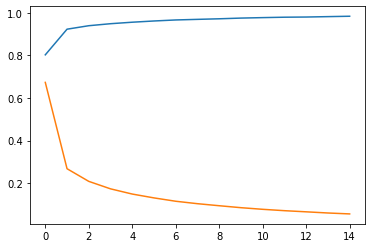

In [38]:
import matplotlib.pyplot as plt
accuracy = mymodel.history['accuracy']
loss = mymodel.history['loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy)
plt.plot(epochs, loss)
plt.show



In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (32, 784)                 0         
                                                                 
 dense_8 (Dense)             (32, 128)                 100480    
                                                                 
 dense_9 (Dense)             (32, 64)                  8256      
                                                                 
 dense_10 (Dense)            (32, 32)                  2080      
                                                                 
 dense_11 (Dense)            (32, 10)                  330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.evaluate(testing_data,testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9727


[0.0840291902422905, 0.9726999998092651]

In [40]:
classifications = model.predict(testing_data)

313/313 [==============================] - 1s 2ms/step


In [41]:
classifications[0]

array([5.4340127e-08, 2.2561333e-06, 1.5177589e-04, 6.4537954e-04,
       2.1148919e-08, 2.7109036e-07, 9.1460043e-12, 9.9918169e-01,
       1.3583938e-05, 4.9412129e-06], dtype=float32)

In [42]:
import numpy as np
test_pred = np.argmax(classifications[0])


In [43]:
test_pred

7

In [44]:
testing_labels[0]

7

In [ ]:
store = []
for c in classifications:
  hold = np.argmax(c)
  store.append(hold)

store  

In [46]:
print(store[9999], testing_labels[9999])

6 6


In [52]:
from google.colab import files
import keras.utils as image
from tensorflow.keras.utils import load_img, img_to_array 

uploaded = files.upload()

for given_function in uploaded.keys():
  path = given_function
  img = image.load_img(path,color_mode = 'grayscale',target_size = (28,28))
  x = image.img_to_array(img)
  x = x.reshape(-1,28,28)
  x = x/255.0
  predicted_value = model.predict(x)
  predicted_value = np.argmax(predicted_value)
  print(predicted_value) 

Saving download.jpeg to download (1).jpeg
Saving images.jpeg to images (2).jpeg
1/1 [==============================] - 0s 15ms/step
6
1/1 [==============================] - 0s 14ms/step
3
